In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm
from scipy.stats import gamma
import matplotlib.pyplot as plt

https://zhiyzuo.github.io/VI/

In [2]:
# setting

y_data = np.array([1.64, 1.70, 1.72, 1.74, 1.82, 1.82, 1.82, 1.90, 2.08, 1.78, 1.86, 1.96, 1.96, 2.0,2.0])
mu = np.linspace(-5, 5, 100)
psi = np.linspace(0.0001, 0.13, 100)
u0 = 0
a0 = 2
b0 = 60

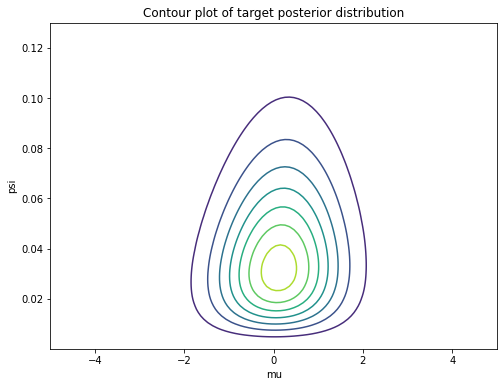

In [3]:
# target posterior

def target_post(mu, psi):
    logpriormu = norm.logpdf(mu, u0, 1)
    logpriorpsi = gamma.logpdf(psi, a0, loc = 0, scale = 1/b0)
    log_L = 0
    for i in range(len(y_data)):
        log_L = norm.logpdf(y_data[i], mu, np.sqrt(1/psi))
        log_L += log_L
    return np.exp(log_L + logpriormu + logpriorpsi)
        

MU, PSI = np.meshgrid(mu, psi)
Z_target = target_post(MU, PSI)

# Contour plot
fig, ax = plt.subplots(figsize=(8,6))
ax.contour(MU, PSI, Z_target)
ax.set_xlabel('mu')
ax.set_ylabel('psi')
ax.set_title('Contour plot of target posterior distribution')

plt.show()

## 3. Run one iteration of a variational clustering. Then draw a contour of the current iterate for a variational distribution.

alpha = 0.11774951181416292, tau = 1.0679178809371992, a = 3.018768214057987, b = 64.03155206878995


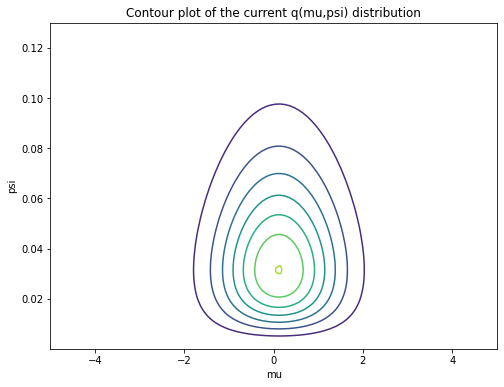

In [7]:
# Iteration

# initial values of parameters
n = len(y_data)
a_i = 2 
b_i = 60
alpha_i = 0 
tau_i = 1
tolerance = 1e-15

a_list = [a_i]
b_list = [b_i]
alpha_list = [alpha_i]
tau_list = [tau_i]
phi_list_list =[]

for i in range(1):
    
    # step1
    phi_list = []
    for j in range(len(y_data)):
        phi = np.sqrt(a_i/b_i)*np.exp(-a_i/b_i * (y_data[j]**2 - 2*y_data[j] * alpha_i + (1/tau_i + alpha_i**2) / 2))
        phi_list.append(phi)
    phi_list = np.exp(np.log(phi_list) - max(phi_list))
        
    # step2
    tau = ( (a_i / b_i) * (phi_list @ np.ones(len(phi_list)))) + 1
    alpha = ( (a_i / b_i) * (phi_list @ y_data) ) / tau
    

    # step3
    a = 1/2 * (phi_list @ np.ones(len(phi_list))) + 2
    b = ( (phi_list @ (y_data **2)) - (2*alpha*(phi_list @ y_data)) + ((1/tau + alpha**2) * (phi_list @ np.ones(len(phi_list)))) ) / 2 + 60
    
    # list update
    a_list.append(a)
    b_list.append(b)
    alpha_list.append(alpha)
    tau_list.append(tau)
    
print("alpha = {}, tau = {}, a = {}, b = {}".format(alpha, tau, a, b))

# mean-field variational distribtuion
q_z = np.log(phi_list).sum()
q_mu = norm.logpdf(MU, loc = alpha, scale = np.sqrt(1/tau))
q_psi = gamma.logpdf(PSI, a, loc = 0, scale = 1/b)
Z = np.exp(q_mu + q_psi) * np.exp(q_z)

# Contour plot
fig, ax = plt.subplots(figsize=(8,6))
ax.contour(MU, PSI, Z)
ax.set_xlabel('mu')
ax.set_ylabel('psi')
ax.set_title('Contour plot of the current q(mu,psi) distribution')

plt.show()

## 4. Iterate the variational inference until ELBO converges.

In [5]:
# Iteration

# initial values of parameters
n = len(y_data)
a_i = 2 
b_i = 60
alpha_i = 0 
tau_i = 1
max_iter = 100
tolerance = 1e-15

a_list = [a_i]
b_list = [b_i]
alpha_list = [alpha_i]
tau_list = [tau_i]
phi_list_list =[]

for i in range(max_iter):
    
    # step1
    phi_list = []
    for j in range(len(y_data)):
        phi = np.sqrt(a_i/b_i)*np.exp(-a_i/b_i * (y_data[j]**2 - 2*y_data[j] * alpha_i + (1/tau_i + alpha_i**2) / 2))
        phi_list.append(phi)
    phi_list = np.exp(np.log(phi_list) - max(phi_list))
        
    # step2
    tau = ( (a_i / b_i) * (phi_list @ np.ones(len(phi_list)))) + 1
    alpha = ( (a_i / b_i) * (phi_list @ y_data) ) / tau
    

    # step3
    a = 1/2 * (phi_list @ np.ones(len(phi_list))) + 2
    b = ( (phi_list @ (y_data **2)) - (2*alpha*(phi_list @ y_data)) + ((1/tau + alpha**2) * (phi_list @ np.ones(len(phi_list)))) ) / 2 + 60
    
    # list update
    a_list.append(a)
    b_list.append(b)
    alpha_list.append(alpha)
    tau_list.append(tau)
    
    # Stopping rule
    if abs(a_list[i+1] - a_list[i]) < tolerance and abs(b_list[i+1] - b_list[i]) < tolerance and abs(alpha_list[i+1] - alpha_list[i]) < tolerance and abs(tau_list[i+1] - tau_list[i]) < tolerance:
        converged = True
        break
    
    # update the a,b,alpha, phi for the next iteration
    a_i = a
    b_i = b
    alpha_i = alpha
    tau_i = tau
    
if converged:
    print("alpha = {}, tau = {}, a = {}, b = {}".format(alpha, tau, a, b))

alpha = 0.19123820094537497, tau = 1.1152313192199843, a = 3.168830327500868, b = 64.28504011859259


## 5. Superimpose the contours of the optimal variational distribution over that of the target mixture posterior distribution to compare them. 

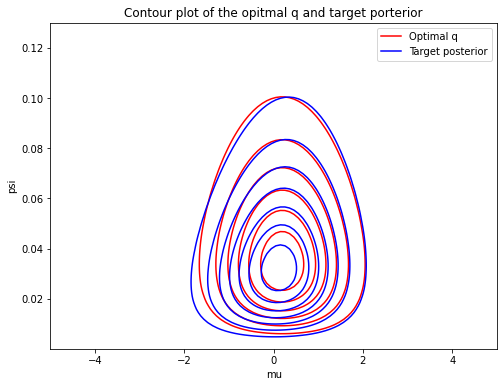

In [6]:
# Superimpose the contour plots of optimal q and target posterior

# mean-field variational distribtuion 
q_z = np.log(phi_list).sum()
q_mu = norm.logpdf(MU, loc = alpha, scale = np.sqrt(1/tau))
q_psi = gamma.logpdf(PSI, a, loc = 0, scale = 1/b)
Z = np.exp(q_mu + q_psi) * np.exp(q_z)

fig, ax = plt.subplots(figsize = (8,6))
q = ax.contour(MU, PSI, Z, colors = 'red')
p = ax.contour(MU, PSI, Z_target, colors = 'blue')

proxy_artists = [plt.Line2D([0], [0], linestyle='-', color=q.collections[0].get_edgecolor()[0]),
                 plt.Line2D([0], [0], linestyle='-', color=p.collections[0].get_edgecolor()[0])]
labels = ['Optimal q', 'Target posterior']
plt.legend(proxy_artists, labels)

ax.set_xlabel('mu')
ax.set_ylabel('psi')
ax.set_title('Contour plot of the opitmal q and target porterior')
plt.show()